In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating path for dataset
current_dir = os.getcwd()
dataset_file = '/home/ubuntu/Downloads/realtor-data.zip.csv'


In [4]:
dataset_path = os.path.join(current_dir, dataset_file)

In [5]:
data = pd.read_csv(dataset_path)
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


Top 5 rows in the dataset

In [6]:
# Shape of the data
data.shape

print(f'Rows: {data.shape[0]} and column: {data.shape[1]}')

Rows: 2226382 and column: 12


Our dataset has 2226382 rows and 12 columns

In [7]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [8]:
data['city'].value_counts().head()

city
Houston          23862
Chicago          18238
New York City    12634
Jacksonville     11743
Philadelphia     10449
Name: count, dtype: int64

## let's see weather a column contains null values or not

In [9]:
data.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

### it seems like we have lot of work to do.
- Except for status every other column atleast contains a null values

Let's visualize the null values 

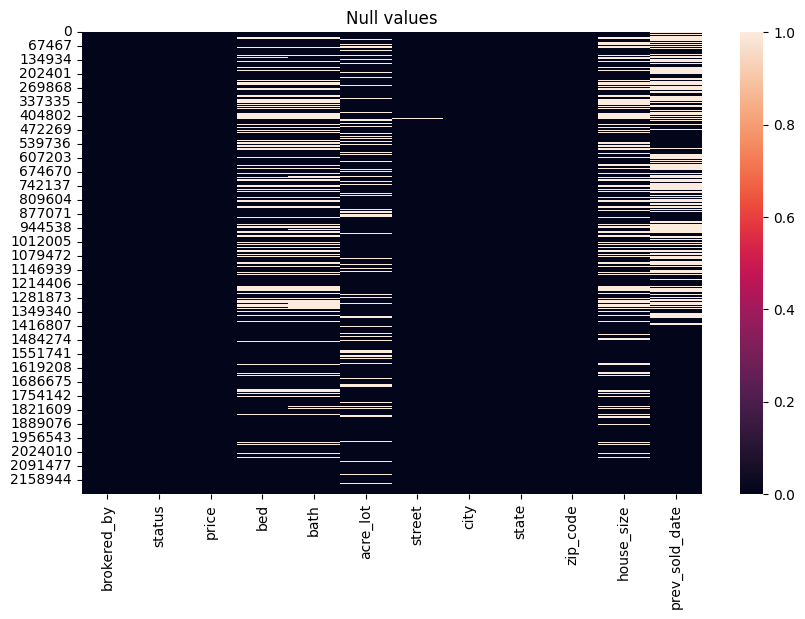

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('Null values')
plt.show()

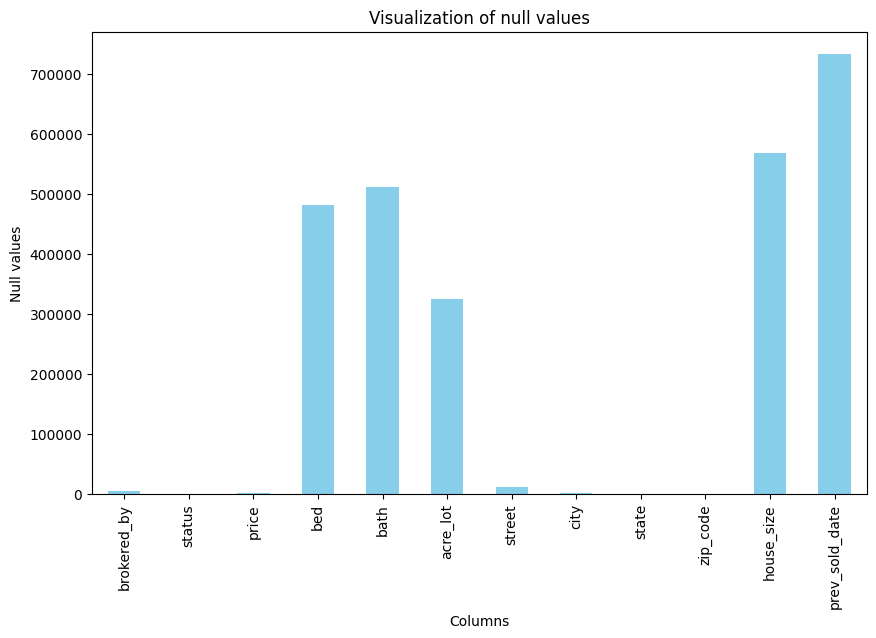

In [11]:
plt.figure(figsize=(10, 6))
data.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Visualization of null values')
plt.xlabel('Columns')
plt.ylabel('Null values')
plt.show()

As we can see there is highest null_values in prev_sold_date.

We need to fill all theses values in proper way to get a better prediction

Let's fill the columns that has low number of missing values.

In [12]:
cols_to_fill = ['brokered_by', 'price', 'street', 'zip_code']


In [13]:
data[cols_to_fill] = data[cols_to_fill].fillna(data[cols_to_fill].median())

In [14]:
data.isnull().sum()

brokered_by            0
status                 0
price                  0
bed               481317
bath              511771
acre_lot          325589
street                 0
city                1407
state                  8
zip_code               0
house_size        568484
prev_sold_date    734297
dtype: int64

In [15]:
# Lets drop prev_sold_date column


In [16]:
data = data.drop('prev_sold_date', axis=1)

In [17]:
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN


In [18]:
data.isnull().sum()

brokered_by         0
status              0
price               0
bed            481317
bath           511771
acre_lot       325589
street              0
city             1407
state               8
zip_code            0
house_size     568484
dtype: int64

Let's drop the datasets that contains large missing values 

In [19]:
data.dropna(inplace=True)


In [20]:
data.isnull().sum()

brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
street         0
city           0
state          0
zip_code       0
house_size     0
dtype: int64

In [21]:
data.shape

(1360915, 11)

In [33]:
# Lets see the types of our dataframe
data.dtypes

brokered_by    float64
status          object
price          float64
bed            float64
bath           float64
acre_lot       float64
street         float64
city            object
state           object
zip_code       float64
house_size     float64
dtype: object

<Axes: xlabel='state'>

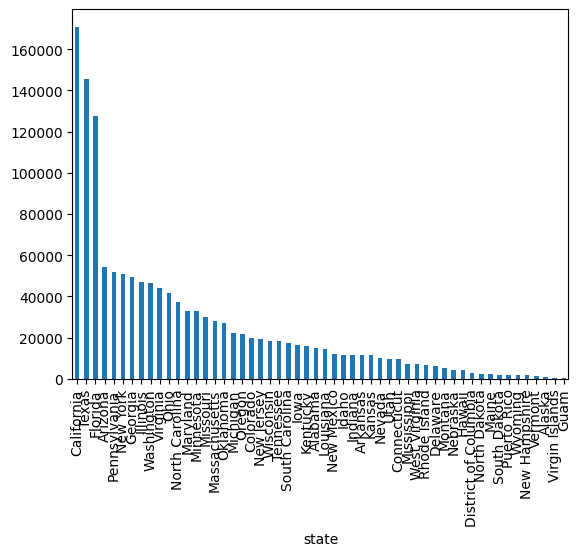

In [ ]:
data['state'].value_counts().plot(kind='bar')

In [40]:
filter_df = data[data['state'] != 'California']
filter_df = filter_df.reset_index(drop=True)

<Axes: >

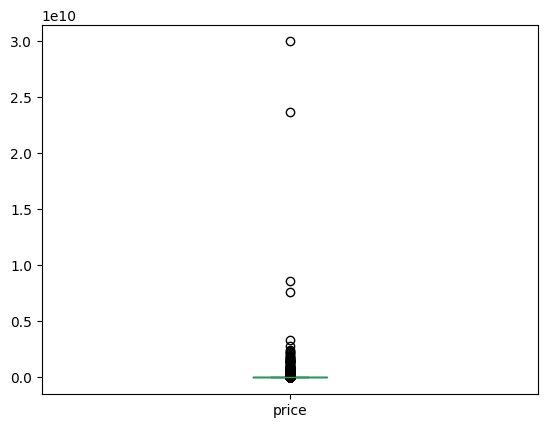

In [51]:
sum = data.groupby('brokered_by')['price'].sum().plot(kind='box')
sum

In [53]:
data['status'].value_counts()

status
for_sale    751007
sold        609908
Name: count, dtype: int64

In [54]:
def univariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)

    # Get value counts
    value_counts = data[xlabel].value_counts()
    ax = value_counts.plot.bar(
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    total = value_counts.sum()
    # Add percentage label for each plot
    for plot in ax.patches:
        height = plot.get_height()
        ax.annotate(
            # Percentage label text
            f"{height / total * 100:.1f}%",
            xy=(
                # Percentage label x co-ordinate
                plot.get_x() + plot.get_width() / 2.,
                # Percentage label y co-ordinate
                height,
            ),
            # Percentage label horizontal align
            ha="center",

        )

    ax.set_title(f"Distribution of {xlabel} in the dataset", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

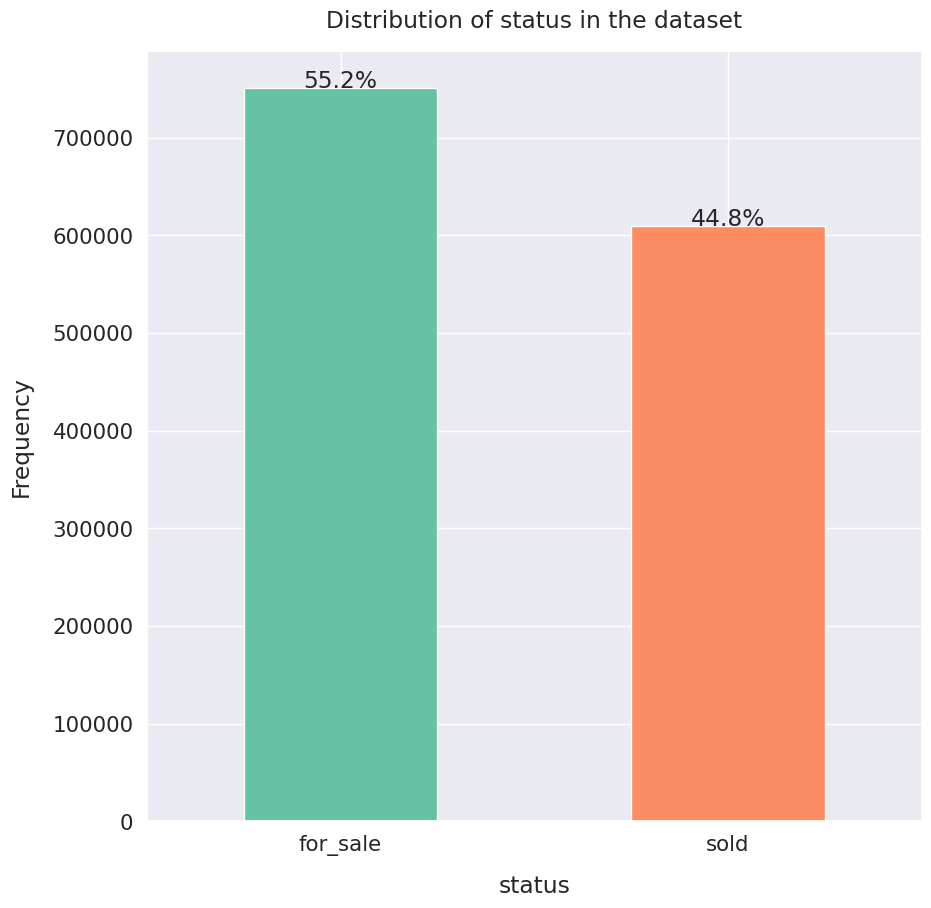

In [55]:
univariate_barplot(data, 'status')

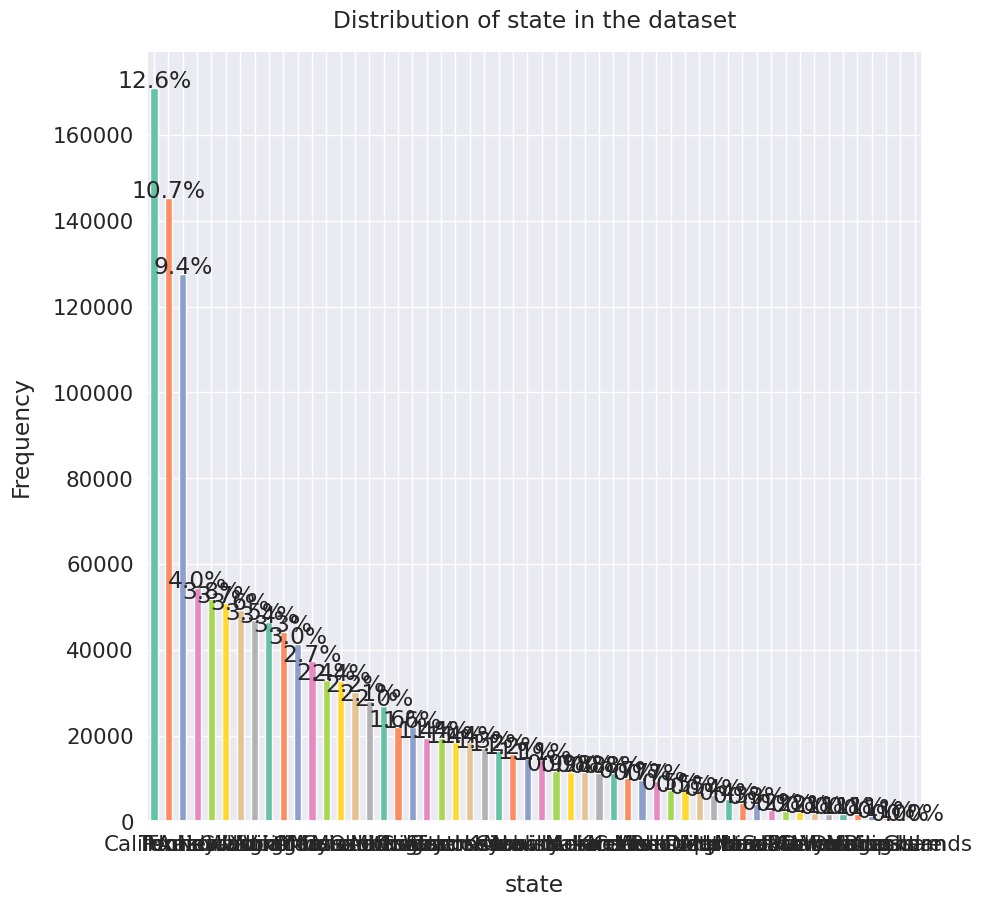

In [56]:
univariate_barplot(data, 'state')

lets work on categorical features and numerical features



In [57]:
# categorical
categorical = ['state', 'status', 'city']


In [58]:
# numerical 

numerical_features = ['bath', 'bed', 'acre_lot', 'brokered_by', 'street', 'zip_code', 'house_size']